In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-white')

C:\Users\Austin\AppData\Local\Temp\ipykernel_18196\2867724180.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [94]:
print('Loading Data')
matched_volumes = pd.read_csv('../input/matched_hathi_estc_nov2023.csv', index_col=0)
estc_data = pd.read_csv('../input/estc_1500_to_1800.csv', index_col=0)
hathitrust_data = pd.read_csv('../temporary/volumes_scores.csv')
metadata = pd.read_csv('../temporary/metadata.csv')

Loading Data


C:\Users\Austin\AppData\Local\Temp\ipykernel_18196\2579523277.py:3: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  estc_data = pd.read_csv('../input/estc_1500_to_1800.csv', index_col=0)


In [95]:
matched_volumes.head()

,Title,Title.1,HTID,ESTC System No.,Match Score
0,A sentimental journey through France and Italy,Yorickâ€™s sentimental journey through France ...,coo.31924096960947,6214773,87.378641
1,Traditions of Eden,The Garden of Eden,coo.31924096961259,6157289,61.111111
2,A history of the county of Brecknock,A list of the court of aldermen,coo.31924096162064,6159287,71.641791
3,"Tree and serpent worship: or, Illustrations of...",The history of the Church of Christ. Volume th...,coo.31924096988872,6059892,56.170213
4,Thirteen satires,The snare,coo.31924096977644,6133567,64.000000


In [96]:
estc_data.rename(columns={'Title': 'title_estc', 'ESTC System No.': 'estc_id'}, inplace=True)
estc_data.head()

,estc_id,ESTC Citation No.,Author - personal,title_estc,Publisher/year,Physical descr.,General note,Citation/references,Surrogates,Loc. of filmed copy,Subject,Added name,Copies - Brit.Isles,Copies - N.America,Electronic location,Variant title,Uncontrolled note,Author - corporate,Uniform title,Corporate subject,Copies - Other,Edition,Person as subject,Added Title,Genre/form,Title as subject,Copies - Europe,Collective title,Conference subject,Index/finding aids,Numbering note,Dates of pub.,Publicat. frequency,Continued by,Other editions,Supplement to,Link note,Related item,Supplement details,Continues,Meeting name,Supplement note,System details,Issued with,Translated as,Loc. of original,"Summary, etc.",Former pub. freq.,Abbreviated title,Translation of,Issuing body,Merged with,Absorbed in part,Bibliography etc.,Series,Absorbed by,Continued in pt. by,Related record,Absorbed,Formed by,Changed back to,Continues in part,Geographic coverage,Separated from,Language note
0,6182456,S110939,"Betson, Thomas.",Here begynneth a ryght profytable treatyse co[...,"[Westminster : Wynkyn de Worde, 1500]",[36] p. : ill. ; 4⁰.,"['Caption title.', 'Imprint from STC.', 'Print...","['STC (2nd ed.), 1978', 'Duff, 43', 'GW, 4190']","Available on microfilm. Ann Arbor, Mich.: Univ...",C.,Christian life -- Catholic authors -- Early wo...,"Worde, Wynkyn de, -1534?, printer.",['Cambridge University Library (includes Sir G...,"['Folger Shakespeare', 'United States, Library...",['Early English Books Online (EEBO) ; { Reprod...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6190320,S118960,NaN,[The history of Guy of Warwick],"[London? : [R. Pynson, 1500?]]",[3]+ leaves ; 4⁰.,['Printer’s name from and publication date con...,"STC (2nd ed.), 12540","Available on microfilm. Ann Arbor, Mich.: Univ...",L.,Guy of Warwick (Legendary character) -- Early ...,"Pynson, Richard, -1530, printer.","['British Library', 'British Library']",NaN,Early English Books Online (EEBO) ; { Reproduc...,"['Erle to be his leue home agayne', 'Erle to b...",RPM 10/18/96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6203003,S93554,NaN,[Horae ad usum Sarum.],[Thys emprynteth at Westmynster : by me Julyay...,[32]+ p. ; 64⁰.,"['Title from STC.', 'Imprint from colophon.', ...","STC (2nd ed.), 15895",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catholic Church.,Liturgies. Latin. Hours and Primers. Salisbury...,Catholic Church -- Liturgies -- Early works to...,State Library of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6186462,S115128,NaN,[Sir Eglamour],"[Westminster : Wynkyn de Worde, 1500]",[2+] p. ; 4⁰.,['In verse. Second line on only extant leaf re...,"['STC (2nd ed.), 7541', 'Duff, 135']","Available on microfilm. Ann Arbor, Mich.: Univ...",C.,Romances -- Early works to 1800.,"Worde, Wynkyn de, -1534?, printer.",Cambridge University Library (includes Sir Geo...,NaN,Early English Books Online (EEBO) ; { Reproduc...,If that he be a crysten man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6204328,S92225,NaN,[11 Edw. IV.] De termino sancte Trinitatis [etc.],"London [R. Pynson, 1500?]",[No pagination provided] ; 2⁰.,a-b⁶ c⁴ (a1 blank); not foliated; 16 leaves.,"STC (2nd ed.), 9836",NaN,NaN,NaN,"Pynson, Richard, -1530, printer.","The John Rylands Library, The University of Ma...",NaN,NaN,NaN,Place-holder record.,NaN,ENGLAND - YEARBOOKS - Edward IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [97]:
estc_data.columns

Index(['estc_id', 'ESTC Citation No.', 'Author - personal', 'title_estc',
       'Publisher/year', 'Physical descr.', 'General note',
       'Citation/references', 'Surrogates', 'Loc. of filmed copy', 'Subject',
       'Added name', 'Copies - Brit.Isles', 'Copies - N.America',
       'Electronic location', 'Variant title', 'Uncontrolled note',
       'Author - corporate', 'Uniform title', 'Corporate subject',
       'Copies - Other', 'Edition', 'Person as subject', 'Added Title',
       'Genre/form', 'Title as subject', 'Copies - Europe', 'Collective title',
       'Conference subject', 'Index/finding aids', 'Numbering note',
       'Dates of pub.', 'Publicat. frequency', 'Continued by',
       'Other editions', 'Supplement to', 'Link note', 'Related item',
       'Supplement details', 'Continues', 'Meeting name', 'Supplement note',
       'System details', 'Issued with', 'Translated as', 'Loc. of original',
       'Summary, etc.', 'Former pub. freq.', 'Abbreviated title',
       'Tran

In [98]:
#clean estc metadata
characters_to_remove = "[]()-'.,:"

# estc_data[['Subject', 'Corporate subject', 'Person as subject', 'Title as subject', 'Conference subject']] = estc_data[['Subject', 'Corporate subject', 'Person as subject', 'Title as subject', 'Conference subject']].astype(str)

#list of conditions check
conditions = [
    ~estc_data['Subject'].isna(),
    estc_data['Subject'].isna() & ~estc_data['Corporate subject'].isna(),
    estc_data['Subject'].isna() & estc_data['Corporate subject'].isna() & ~estc_data['Person as subject'].isna(),
    estc_data['Subject'].isna() & estc_data['Corporate subject'].isna() & estc_data['Person as subject'].isna() & ~estc_data['Title as subject'].isna(),
    estc_data['Subject'].isna() & estc_data['Corporate subject'].isna() & estc_data['Person as subject'].isna() & estc_data['Title as subject'].isna() & ~estc_data['Conference subject'].isna()
]

#list of columns to progressively fill in.
choices = [
    estc_data['Subject'],
    estc_data['Corporate subject'],
    estc_data['Person as subject'],
    estc_data['Title as subject'],
    estc_data['Conference subject']
]

estc_data['Topic'] = np.select(conditions, choices, default='nan')


estc_data['Topic'] = estc_data['Topic'].str.translate({ord(c): None for c in characters_to_remove})

#remove extra spaces
estc_data['Topic'] = [' '.join(s.split()) for s in estc_data['Topic']]
estc_data['Topic'] = estc_data['Topic'].replace('nan', np.NaN)
estc_data

,estc_id,ESTC Citation No.,Author - personal,title_estc,Publisher/year,Physical descr.,General note,Citation/references,Surrogates,Loc. of filmed copy,Subject,Added name,Copies - Brit.Isles,Copies - N.America,Electronic location,Variant title,Uncontrolled note,Author - corporate,Uniform title,Corporate subject,Copies - Other,Edition,Person as subject,Added Title,Genre/form,Title as subject,Copies - Europe,Collective title,Conference subject,Index/finding aids,Numbering note,Dates of pub.,Publicat. frequency,Continued by,Other editions,Supplement to,Link note,Related item,Supplement details,Continues,Meeting name,Supplement note,System details,Issued with,Translated as,Loc. of original,"Summary, etc.",Former pub. freq.,Abbreviated title,Translation of,Issuing body,Merged with,Absorbed in part,Bibliography etc.,Series,Absorbed by,Continued in pt. by,Related record,Absorbed,Formed by,Changed back to,Continues in part,Geographic coverage,Separated from,Language note,Topic
0,6182456,S110939,"Betson, Thomas.",Here begynneth a ryght profytable treatyse co[...,"[Westminster : Wynkyn de Worde, 1500]",[36] p. : ill. ; 4⁰.,"['Caption title.', 'Imprint from STC.', 'Print...","['STC (2nd ed.), 1978', 'Duff, 43', 'GW, 4190']","Available on microfilm. Ann Arbor, Mich.: Univ...",C.,Christian life -- Catholic authors -- Early wo...,"Worde, Wynkyn de, -1534?, printer.",['Cambridge University Library (includes Sir G...,"['Folger Shakespeare', 'United States, Library...",['Early English Books Online (EEBO) ; { Reprod...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christian life Catholic authors Early works to...
1,6190320,S118960,NaN,[The history of Guy of Warwick],"[London? : [R. Pynson, 1500?]]",[3]+ leaves ; 4⁰.,['Printer’s name from and publication date con...,"STC (2nd ed.), 12540","Available on microfilm. Ann Arbor, Mich.: Univ...",L.,Guy of Warwick (Legendary character) -- Early ...,"Pynson, Richard, -1530, printer.","['British Library', 'British Library']",NaN,Early English Books Online (EEBO) ; { Reproduc...,"['Erle to be his leue home agayne', 'Erle to b...",RPM 10/18/96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guy of Warwick Legendary character Early works...
2,6203003,S93554,NaN,[Horae ad usum Sarum.],[Thys emprynteth at Westmynster : by me Julyay...,[32]+ p. ; 64⁰.,"['Title from STC.', 'Imprint from colophon.', ...","STC (2nd ed.), 15895",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catholic Church.,Liturgies. Latin. Hours and Primers. Salisbury...,Catholic Church -- Liturgies -- Early works to...,State Library of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catholic Church Liturgies Early works to 1800
3,6186462,S115128,NaN,[Sir Eglamour],"[Westminster : Wynkyn de Worde, 1500]",[2+] p. ; 4⁰.,['In verse. Second line on only extant leaf re...,"['STC (2nd ed.), 7541', 'Duff, 135']","Available on microfilm. Ann Arbor, Mich.: Univ...",C.,Romances -- Early works to 1800.,"Worde, Wynkyn de, -1534?, printer.",Cambridge University Library (includes Sir Geo...,NaN,Early English Books Online (EEBO) ; { Reproduc...,If that he be a crysten man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romances Early works to 1800
4,6204328,S92225,NaN,[11 Edw. IV.] De termino sancte Trinitatis [etc.],"London [R. Pynson, 1500?]",[No pagination provided] ; 2⁰.,a-b⁶ c⁴ (a1 blank); not foliated; 16 leaves.,"STC (2nd ed.), 9836",NaN,NaN,NaN,"Pynson, Richard, -1530, printer.","The John Ry

In [99]:
estc_data['Topic'].dtype

dtype('O')

In [100]:
estc_data[['Subject', 'Corporate subject', 'Person as subject', 'Title as subject', 'Conference subject', 'Topic']]

,Subject,Corporate subject,Person as subject,Title as subject,Conference subject,Topic
0,Christian life -- Catholic authors -- Early wo...,NaN,NaN,NaN,NaN,Christian life Catholic authors Early works to...
1,Guy of Warwick (Legendary character) -- Early ...,NaN,NaN,NaN,NaN,Guy of Warwick Legendary character Early works...
2,NaN,Catholic Church -- Liturgies -- Early works to...,NaN,NaN,NaN,Catholic Church Liturgies Early works to 1800
3,Romances -- Early works to 1800.,NaN,NaN,NaN,NaN,Romances Early works to 1800
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
467798,NaN,NaN,NaN,NaN,NaN,NaN
467834,NaN,NaN,NaN,NaN,NaN,NaN
468268,NaN,NaN,NaN,NaN,NaN,NaN
468278,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
hathitrust_data.head()

,Religion,Science,Political Economy,HTID,industry_2,industry_3,industry_1643,percent_regression,percent_pessimism,percent_optimistic,percent_progress_original,optimism_score,Year,oclc,Year_rounded,percent_progress_main,percent_progress_secondary,progress_regression_original,progress_regression_main,progress_regression_secondary,optimism_percentile,industry_2_percentile,industry_3_percentile,industry_1643_percentile,optimistic_percentile,progress_percentile_original,progress_percentile_main,progress_percentile_secondary,pessimism_percentile,regression_percentile,progress_regression_percentile_original,progress_regression_percentile_main,progress_regression_percentile_secondary
0,0.142857,0.214286,0.642857,uc1.31158006542020,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1524.0,12829704.0,1524.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118201,0.010274,0.009783,0.010503,0.071812,0.165287,0.216157,0.279079,0.130762,0.490221,0.169488,0.221962,0.286382
1,0.083333,0.083333,0.833333,uc1.ax0000261321,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1522.0,12240959.0,1522.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118201,0.010274,0.009783,0.010503,0.071812,0.165287,0.216157,0.279079,0.130762,0.490221,0.169488,0.221962,0.286382
2,0.450000,0.450000,0.100000,uc1.l0054623798,0.051488,0.073954,0.010239,0.0,0.000387,0.011948,0.000000,0.011560,1509.0,8223560.0,1509.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.798395,0.131660,0.189765,0.255247,0.782677,0.165287,0.216157,0.279079,0.350543,0.490221,0.169488,0.221962,0.286382
3,0.533333,0.133333,0.333333,msu.31293027025703,0.009477,0.009477,0.001152,0.0,0.000000,0.000000,0.000000,0.000000,1514.0,8463693.0,1514.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118201,0.033288,0.030783,0.029186,0.071812,0.165287,0.216157,0.279079,0.130762,0.490221,0.169488,0.221962,0.286382
4,0.476190,0.476190,0.047619,msu.31293010566796,0.034019,0.039921,0.004935,0.0,0.002246,0.013755,0.000295,0.011804,1509.0,8455593.0,1509.0,0.000295,0.000033,0.000295,0.000295,0.000033,0.805288,0.076408,0.079510,0.079292,0.828284,0.406348,0.485705,0.565958,0.657419,0.490221,0.407715,0.487091,0.568043


In [102]:
#start by merging year from Hathitrust data
matched_volumes = matched_volumes.merge(hathitrust_data[['HTID', 'Year']], on = 'HTID', how = 'inner')

In [103]:
matched_volumes = matched_volumes[matched_volumes['Year'] <= 1800]

In [104]:
matched_volumes

,Title,Title.1,HTID,ESTC System No.,Match Score,Year
18,Transactions,Instructions,coo.31924003457953,6237091,66.666667,1791.0
31,Vegetable culture for amateurs,Prayers for children,coo.31924003303660,6274137,52.000000,1800.0
84,"Grand Council Royal and Select Masters, Englan...","To Edward Wheler, Esqr. &ca. Council, fort Wil...",coo.31924016286381,6043209,52.252252,1800.0
94,Cucumber culture for amateurs,Prayers for children,coo.31924019147622,6274137,57.142857,1800.0
107,The Law list,The Daily post,coo.31924006955771,6072265,61.538462,1700.0
...,...,...,...,...,...,...
160658,The first book of architecture,The first book of architecture,ucbk.ark+=28722=h29p8v,6152011,100.000000,1721.0
160667,The first book of architecture,The first book of architecture,ucbk.ark+=28722=h20d1n,6152011,100.000000,1716.0
160678,The lives and characters of the English dramat...,An essay on the dramatic character of Sir John...,emu.010002482099,6245451,67.272727,1699.0
160679,"A short account of that part of Africa, inhabi...",A brief account of the present state of the Af...,emu.010002630659,6328251,66.115702,1768.0


In [105]:
matched_volumes.rename(columns={'Title': 'title_hathi', 'ESTC System No.': 'estc_id', 'Match Score': 'match_score'}, inplace=True)
matched_volumes.drop(columns='Title.1', inplace=True)
matched_volumes.head()

,title_hathi,HTID,estc_id,match_score,Year
18,Transactions,coo.31924003457953,6237091,66.666667,1791.0
31,Vegetable culture for amateurs,coo.31924003303660,6274137,52.000000,1800.0
84,"Grand Council Royal and Select Masters, Englan...",coo.31924016286381,6043209,52.252252,1800.0
94,Cucumber culture for amateurs,coo.31924019147622,6274137,57.142857,1800.0
107,The Law list,coo.31924006955771,6072265,61.538462,1700.0


In [106]:
matched_volumes_estc = pd.merge(matched_volumes, estc_data, on = 'estc_id', how = "inner")

In [107]:
matched_volumes_estc

,title_hathi,HTID,estc_id,match_score,Year,ESTC Citation No.,Author - personal,title_estc,Publisher/year,Physical descr.,General note,Citation/references,Surrogates,Loc. of filmed copy,Subject,Added name,Copies - Brit.Isles,Copies - N.America,Electronic location,Variant title,Uncontrolled note,Author - corporate,Uniform title,Corporate subject,Copies - Other,Edition,Person as subject,Added Title,Genre/form,Title as subject,Copies - Europe,Collective title,Conference subject,Index/finding aids,Numbering note,Dates of pub.,Publicat. frequency,Continued by,Other editions,Supplement to,Link note,Related item,Supplement details,Continues,Meeting name,Supplement note,System details,Issued with,Translated as,Loc. of original,"Summary, etc.",Former pub. freq.,Abbreviated title,Translation of,Issuing body,Merged with,Absorbed in part,Bibliography etc.,Series,Absorbed by,Continued in pt. by,Related record,Absorbed,Formed by,Changed back to,Continues in part,Geographic coverage,Separated from,Language note,Topic
0,Transactions,coo.31924003457953,6237091,66.666667,1791.0,T37289,NaN,Instructions,"[London, 1706?]","[2],65[1]p. ; 2⁰.",Undated instructions issued by Prince George o...,NaN,NaN,NaN,NaN,NaN,British Library,NaN,NaN,NaN,NaN,England and Wales. Royal Navy.,Instructions. 1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Transactions,coo.31924062393214,6237091,66.666667,1800.0,T37289,NaN,Instructions,"[London, 1706?]","[2],65[1]p. ; 2⁰.",Undated instructions issued by Prince George o...,NaN,NaN,NaN,NaN,NaN,British Library,NaN,NaN,NaN,NaN,England and Wales. Royal Navy.,Instructions. 1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Transactions,mdp.39015055639655,6237091,66.666667,1800.0,T37289,NaN,Instructions,"[London, 1706?]","[2],65[1]p. ; 2⁰.",Undated instructions issued by Prince George o...,NaN,NaN,NaN,NaN,NaN,British Library,NaN,NaN,NaN,NaN,England and Wales. Royal Navy.,Instructions. 1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vegetable culture for amateurs,coo.31924003303660,6274137,52.000000,1800.0,T179380,"Wesley, John, 1703-1791.",Prayers for children.,"Bristol : printed by William Pine, 1772.","[2],5-22p. ; 12⁰.",Anonymous. By John Wesley.,"Baker, 281",NaN,NaN,NaN,NaN,"The John Rylands Library, The University of Ma...",NaN,NaN,NaN,Half-title called for?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cucumber culture for amateurs,coo.31924019147622,6274137,57.142857,1800.0,T179380,"Wesley, John, 1703-1791.",Prayers for children.,"Bristol : printed by William Pine, 1772.","[2],5-22p. ; 12⁰.",Anonymous. By John Wesley.,"Baker, 281",NaN,NaN,NaN,NaN,"The John Rylands Library, The University of Ma...",NaN,NaN,NaN,Half-title called for?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18832,"A memorial, most humbly addressed to the sover...",uc1.b3154374,6327654,92.800000,1780.0,T56094,"Pownall, Thomas, 1722-1805.","A memorial, most humbly addressed to the sover...","London : printed for J. Almon, opposite Burlin...","[2],vii

In [108]:
hathitrust_data

,Religion,Science,Political Economy,HTID,industry_2,industry_3,industry_1643,percent_regression,percent_pessimism,percent_optimistic,percent_progress_original,optimism_score,Year,oclc,Year_rounded,percent_progress_main,percent_progress_secondary,progress_regression_original,progress_regression_main,progress_regression_secondary,optimism_percentile,industry_2_percentile,industry_3_percentile,industry_1643_percentile,optimistic_percentile,progress_percentile_original,progress_percentile_main,progress_percentile_secondary,pessimism_percentile,regression_percentile,progress_regression_percentile_original,progress_regression_percentile_main,progress_regression_percentile_secondary
0,0.142857,0.214286,0.642857,uc1.31158006542020,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1524.0,12829704.0,1524.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118201,0.010274,0.009783,0.010503,0.071812,0.165287,0.216157,0.279079,0.130762,0.490221,0.169488,0.221962,0.286382
1,0.083333,0.083333,0.833333,uc1.ax0000261321,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1522.0,12240959.0,1522.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118201,0.010274,0.009783,0.010503,0.071812,0.165287,0.216157,0.279079,0.130762,0.490221,0.169488,0.221962,0.286382
2,0.450000,0.450000,0.100000,uc1.l0054623798,0.051488,0.073954,0.010239,0.0,0.000387,0.011948,0.000000,0.011560,1509.0,8223560.0,1509.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.798395,0.131660,0.189765,0.255247,0.782677,0.165287,0.216157,0.279079,0.350543,0.490221,0.169488,0.221962,0.286382
3,0.533333,0.133333,0.333333,msu.31293027025703,0.009477,0.009477,0.001152,0.0,0.000000,0.000000,0.000000,0.000000,1514.0,8463693.0,1514.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118201,0.033288,0.030783,0.029186,0.071812,0.165287,0.216157,0.279079,0.130762,0.490221,0.169488,0.221962,0.286382
4,0.476190,0.476190,0.047619,msu.31293010566796,0.034019,0.039921,0.004935,0.0,0.002246,0.013755,0.000295,0.011804,1509.0,8455593.0,1509.0,0.000295,0.000033,0.000295,0.000295,0.000033,0.805288,0.076408,0.079510,0.079292,0.828284,0.406348,0.485705,0.565958,0.657419,0.490221,0.407715,0.487091,0.568043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160894,0.504960,0.375352,0.119689,iau.31858045608282,0.121884,0.139552,0.015572,0.0,0.002471,0.001273,0.005166,0.003968,1895.0,35045668.0,1895.0,0.003893,0.002845,0.005166,0.003893,0.002845,0.447641,0.429822,0.449195,0.456765,0.269163,0.920410,0.909210,0.907190,0.682509,0.490221,0.920571,0.909303,0.907395
160895,0.207138,0.386704,0.406159,nnc1.cr59946369,0.116226,0.117570,0.009917,0.0,0.002783,0.006110,0.000288,0.003615,1897.0,35789301.0,1897.0,0.000000,0.000000,0.000288,0.000000,0.000000,0.425074,0.408169,0.368623,0.243233,0.558549,0.404515,0.216157,0.279079,0.713286,0.490221,0.405870,0.221962,0.286382
160896,0.111942,0.284777,0.603281,njp.32101063965295,0.174227,0.188627,0.022049,0.0,0.002374,0.002585,0.000422,0.000633,1892.0,32751763.0,1892.0,0.000422,0.000000,0.000422,0.000422,0.000000,0.209026,0.585641,0.582111,0.617686,0.360276,0.440394,0.513552,0.279079,0.672142,0.490221,0.441755,0.515025,0.286382
160897,0.552832,0.029823,0.417345,nyp.33433081799102,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1893.0,23370235.0,1893.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118201,0.010274,0.009783,0.010503,0.071812,0.165287,0.216157,0.279079,0.130762,0.490221,0.169488,0.221962,0.286382


In [109]:
#Match thresholds
matched_75 = matched_volumes_estc[matched_volumes_estc['match_score'] >= 75]
matched_80 = matched_volumes_estc[matched_volumes_estc['match_score'] >= 80]
matched_85 = matched_volumes_estc[matched_volumes_estc['match_score'] >= 85]
matched_90 = matched_volumes_estc[matched_volumes_estc['match_score'] >= 90]

print('Number of matched volumes at each threshold: 75 - ' + str(len(matched_75)) + ' 80 - ' + str(len(matched_80)) + ' 85 - ' + str(len(matched_85)) + ' 90 - ' + str(len(matched_90)))

total = len(hathitrust_data[hathitrust_data['Year'] <= 1800])
print('Percent of matched volumes at each threshold: 75 - ' + str(len(matched_75)/total*100) + ' 80 - ' + str(len(matched_80)/total*100) + ' 85 - ' + str(len(matched_85)/total*100) + ' 90 - ' + str(len(matched_90)/total*100))

Number of matched volumes at each threshold: 75 - 5578 80 - 3844 85 - 2587 90 - 1839
Percent of matched volumes at each threshold: 75 - 29.60564725863808 80 - 20.402314102223873 85 - 13.730693699909772 90 - 9.760628416750704


In [110]:
print(total)

18841


In [111]:
len(hathitrust_data)

160899

In [74]:
def get_word_counts(data):
    topics = data['Topic'].str.split(' ').apply(pd.Series).stack()
    word_counts = Counter(topics)
    return word_counts

words_full = get_word_counts(estc_data)
words_75 = get_word_counts(matched_75)
words_80 = get_word_counts(matched_80)
words_85 = get_word_counts(matched_85)
words_90 = get_word_counts(matched_90)

counts = pd.DataFrame({'population': words_full, 'cutoff_75': words_75, 'cutoff_80': words_80, 'cutoff_85': words_85, 'cutoff_90': words_90})

shares = counts/counts.sum(axis=0)

shares

,population,cutoff_75,cutoff_80,cutoff_85,cutoff_90
Christian,2.917984e-03,0.001602,0.001443,0.001466,0.001516
life,4.262118e-03,0.005235,0.005051,0.005539,0.005155
Catholic,1.051982e-03,0.000828,0.000798,0.000597,0.000607
authors,3.565509e-04,0.000294,0.000228,0.000163,0.000152
Early,1.068486e-01,0.080416,0.075007,0.072825,0.074450
...,...,...,...,...,...
TobaccoPipeMakers,3.926772e-07,NaN,NaN,NaN,NaN
cosmic,3.926772e-07,NaN,NaN,NaN,NaN
rays,3.926772e-07,NaN,NaN,NaN,NaN
14921517,3.926772e-07,NaN,NaN,NaN,NaN


In [75]:
shares = counts/counts.sum(axis=0)

shares.sort_values('population', ascending = False, inplace = True)
shares
shares.to_csv('../output/word_count_shares.csv')

# Volume Distribution Figure

In [76]:
estc_data

,estc_id,ESTC Citation No.,Author - personal,title_estc,Publisher/year,Physical descr.,General note,Citation/references,Surrogates,Loc. of filmed copy,Subject,Added name,Copies - Brit.Isles,Copies - N.America,Electronic location,Variant title,Uncontrolled note,Author - corporate,Uniform title,Corporate subject,Copies - Other,Edition,Person as subject,Added Title,Genre/form,Title as subject,Copies - Europe,Collective title,Conference subject,Index/finding aids,Numbering note,Dates of pub.,Publicat. frequency,Continued by,Other editions,Supplement to,Link note,Related item,Supplement details,Continues,Meeting name,Supplement note,System details,Issued with,Translated as,Loc. of original,"Summary, etc.",Former pub. freq.,Abbreviated title,Translation of,Issuing body,Merged with,Absorbed in part,Bibliography etc.,Series,Absorbed by,Continued in pt. by,Related record,Absorbed,Formed by,Changed back to,Continues in part,Geographic coverage,Separated from,Language note,Topic
0,6182456,S110939,"Betson, Thomas.",Here begynneth a ryght profytable treatyse co[...,"[Westminster : Wynkyn de Worde, 1500]",[36] p. : ill. ; 4⁰.,"['Caption title.', 'Imprint from STC.', 'Print...","['STC (2nd ed.), 1978', 'Duff, 43', 'GW, 4190']","Available on microfilm. Ann Arbor, Mich.: Univ...",C.,Christian life -- Catholic authors -- Early wo...,"Worde, Wynkyn de, -1534?, printer.",['Cambridge University Library (includes Sir G...,"['Folger Shakespeare', 'United States, Library...",['Early English Books Online (EEBO) ; { Reprod...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Christian life Catholic authors Early works to...
1,6190320,S118960,NaN,[The history of Guy of Warwick],"[London? : [R. Pynson, 1500?]]",[3]+ leaves ; 4⁰.,['Printer’s name from and publication date con...,"STC (2nd ed.), 12540","Available on microfilm. Ann Arbor, Mich.: Univ...",L.,Guy of Warwick (Legendary character) -- Early ...,"Pynson, Richard, -1530, printer.","['British Library', 'British Library']",NaN,Early English Books Online (EEBO) ; { Reproduc...,"['Erle to be his leue home agayne', 'Erle to b...",RPM 10/18/96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guy of Warwick Legendary character Early works...
2,6203003,S93554,NaN,[Horae ad usum Sarum.],[Thys emprynteth at Westmynster : by me Julyay...,[32]+ p. ; 64⁰.,"['Title from STC.', 'Imprint from colophon.', ...","STC (2nd ed.), 15895",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catholic Church.,Liturgies. Latin. Hours and Primers. Salisbury...,Catholic Church -- Liturgies -- Early works to...,State Library of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Catholic Church Liturgies Early works to 1800
3,6186462,S115128,NaN,[Sir Eglamour],"[Westminster : Wynkyn de Worde, 1500]",[2+] p. ; 4⁰.,['In verse. Second line on only extant leaf re...,"['STC (2nd ed.), 7541', 'Duff, 135']","Available on microfilm. Ann Arbor, Mich.: Univ...",C.,Romances -- Early works to 1800.,"Worde, Wynkyn de, -1534?, printer.",Cambridge University Library (includes Sir Geo...,NaN,Early English Books Online (EEBO) ; { Reproduc...,If that he be a crysten man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Romances Early works to 1800
4,6204328,S92225,NaN,[11 Edw. IV.] De termino sancte Trinitatis [etc.],"London [R. Pynson, 1500?]",[No pagination provided] ; 2⁰.,a-b⁶ c⁴ (a1 blank); not foliated; 16 leaves.,"STC (2nd ed.), 9836",NaN,NaN,NaN,"Pynson, Richard, -1530, printer.","The John Ry

In [21]:
hathitrust_data

,Religion,Science,Political Economy,HTID,industry_2,industry_3,industry_1643,percent_regression,percent_pessimism,percent_optimistic,percent_progress_original,optimism_score,Year,oclc,Year_rounded,percent_progress_main,percent_progress_secondary,progress_regression_original,progress_regression_main,progress_regression_secondary,optimism_percentile,industry_2_percentile,industry_3_percentile,industry_1643_percentile,optimistic_percentile,progress_percentile_original,progress_percentile_main,progress_percentile_secondary,pessimism_percentile,regression_percentile,progress_regression_percentile_original,progress_regression_percentile_main,progress_regression_percentile_secondary
0,0.142857,0.214286,0.642857,uc1.31158006542020,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1524.0,12829704.0,1524.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118201,0.010274,0.009783,0.010503,0.071812,0.165287,0.216157,0.279079,0.130762,0.490221,0.169488,0.221962,0.286382
1,0.083333,0.083333,0.833333,uc1.ax0000261321,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1522.0,12240959.0,1522.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118201,0.010274,0.009783,0.010503,0.071812,0.165287,0.216157,0.279079,0.130762,0.490221,0.169488,0.221962,0.286382
2,0.450000,0.450000,0.100000,uc1.l0054623798,0.051488,0.073954,0.010239,0.0,0.000387,0.011948,0.000000,0.011560,1509.0,8223560.0,1509.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.798395,0.131660,0.189765,0.255247,0.782677,0.165287,0.216157,0.279079,0.350543,0.490221,0.169488,0.221962,0.286382
3,0.533333,0.133333,0.333333,msu.31293027025703,0.009477,0.009477,0.001152,0.0,0.000000,0.000000,0.000000,0.000000,1514.0,8463693.0,1514.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118201,0.033288,0.030783,0.029186,0.071812,0.165287,0.216157,0.279079,0.130762,0.490221,0.169488,0.221962,0.286382
4,0.476190,0.476190,0.047619,msu.31293010566796,0.034019,0.039921,0.004935,0.0,0.002246,0.013755,0.000295,0.011804,1509.0,8455593.0,1509.0,0.000295,0.000033,0.000295,0.000295,0.000033,0.805288,0.076408,0.079510,0.079292,0.828284,0.406348,0.485705,0.565958,0.657419,0.490221,0.407715,0.487091,0.568043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160894,0.504960,0.375352,0.119689,iau.31858045608282,0.121884,0.139552,0.015572,0.0,0.002471,0.001273,0.005166,0.003968,1895.0,35045668.0,1895.0,0.003893,0.002845,0.005166,0.003893,0.002845,0.447641,0.429822,0.449195,0.456765,0.269163,0.920410,0.909210,0.907190,0.682509,0.490221,0.920571,0.909303,0.907395
160895,0.207138,0.386704,0.406159,nnc1.cr59946369,0.116226,0.117570,0.009917,0.0,0.002783,0.006110,0.000288,0.003615,1897.0,35789301.0,1897.0,0.000000,0.000000,0.000288,0.000000,0.000000,0.425074,0.408169,0.368623,0.243233,0.558549,0.404515,0.216157,0.279079,0.713286,0.490221,0.405870,0.221962,0.286382
160896,0.111942,0.284777,0.603281,njp.32101063965295,0.174227,0.188627,0.022049,0.0,0.002374,0.002585,0.000422,0.000633,1892.0,32751763.0,1892.0,0.000422,0.000000,0.000422,0.000422,0.000000,0.209026,0.585641,0.582111,0.617686,0.360276,0.440394,0.513552,0.279079,0.672142,0.490221,0.441755,0.515025,0.286382
160897,0.552832,0.029823,0.417345,nyp.33433081799102,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1893.0,23370235.0,1893.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118201,0.010274,0.009783,0.010503,0.071812,0.165287,0.216157,0.279079,0.130762,0.490221,0.169488,0.221962,0.286382


In [113]:
estc_data['Year'] = estc_data['Publisher/year'].str.replace(r"\D", '')
estc_data['Year'] = estc_data['Year'].replace('', np.nan)
estc_data = estc_data.dropna(subset = ['Year'])
estc_data['Year'] = estc_data['Year'].astype('float64')
estc_data = estc_data[(estc_data['Year'] >= 1500) & (estc_data['Year'] <= 1800)]
estc_data['Year'] = estc_data['Year'].astype('int')

C:\Users\Austin\AppData\Local\Temp\ipykernel_18196\3410042565.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  estc_data['Year'] = estc_data['Publisher/year'].str.replace(r"\D", '')
C:\Users\Austin\AppData\Local\Temp\ipykernel_18196\3410042565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estc_data['Year'] = estc_data['Publisher/year'].str.replace(r"\D", '')
C:\Users\Austin\AppData\Local\Temp\ipykernel_18196\3410042565.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [114]:
estc_data[['Publisher/year','Year']]

,Publisher/year,Year
0,"[Westminster : Wynkyn de Worde, 1500]",1500
1,"[London? : [R. Pynson, 1500?]]",1500
2,[Thys emprynteth at Westmynster : by me Julyay...,1500
3,"[Westminster : Wynkyn de Worde, 1500]",1500
4,"London [R. Pynson, 1500?]",1500
...,...,...
467798,"[London, 1800]",1800
467834,"[London] : T. Jones, printer, Fetter-lane, [1800]",1800
468268,"[London] : Skirven, printer, London, [1800]",1800
468278,"[London, 1800?]",1800


In [115]:
estc_data['Year'].describe()

count    308761.000000
mean       1723.248548
std          59.638893
min        1500.000000
25%        1683.000000
50%        1731.000000
75%        1776.000000
max        1800.000000
Name: Year, dtype: float64

In [125]:
estc_counts = estc_data.groupby('Year')['Year'].agg('count').pipe(pd.DataFrame).rename(columns = {'Year': 'estc_volumes'})

In [119]:
hathitrust_data['Year'] = hathitrust_data['Year'].astype('int')

In [126]:
hathitrust_counts = hathitrust_data.groupby('Year')['Year'].agg('count').pipe(pd.DataFrame).rename(columns = {'Year': 'hathitrust_volumes'})

In [127]:
estc_counts

,estc_volumes
Year,
1500,33
1501,7
1502,9
1503,7
1504,9
...,...
1796,3909
1797,3583
1798,3927


In [122]:
hathitrust_counts

,Year
Year,
1500,1
1501,1
1509,4
1514,1
1518,1
...,...
1895,3162
1896,3056
1897,3019


In [132]:
volume_counts = estc_counts.join(hathitrust_counts, how = 'outer').reset_index()

In [133]:
volume_counts = volume_counts[volume_counts['Year'] <= 1800]

In [137]:
volume_counts['estc_cumulative'] = volume_counts['estc_volumes'].cumsum() / volume_counts['estc_volumes'].sum()
volume_counts['hathitrust_cumulative'] = volume_counts['hathitrust_volumes'].cumsum() / volume_counts['hathitrust_volumes'].sum()

In [138]:
volume_counts

,Year,estc_volumes,hathitrust_volumes,estc_cumulative,hathitrust_cumulative
0,1500,33.0,1.0,0.000107,0.000053
1,1501,7.0,1.0,0.000130,0.000106
2,1502,9.0,NaN,0.000159,NaN
3,1503,7.0,NaN,0.000181,NaN
4,1504,9.0,NaN,0.000211,NaN
...,...,...,...,...,...
296,1796,3909.0,366.0,0.947374,0.851813
297,1797,3583.0,308.0,0.958978,0.868160
298,1798,3927.0,301.0,0.971697,0.884136
299,1799,3561.0,312.0,0.983230,0.900695


C:\Users\Austin\AppData\Local\Temp\ipykernel_18196\1729994920.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


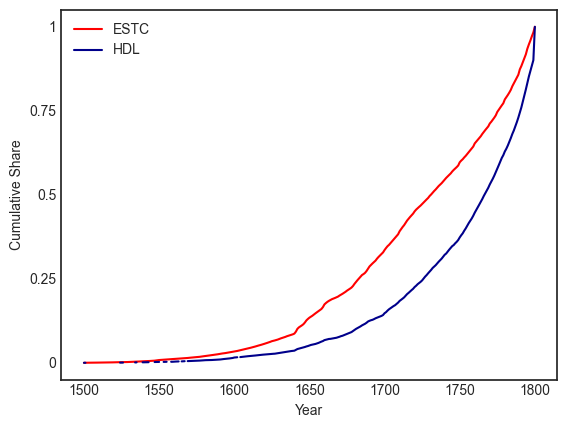

In [143]:
#figure itself

fig, (ax1) = plt.subplots(1,1)
ax1.plot(volume_counts['Year'], volume_counts['estc_cumulative'], color = 'red', label = 'ESTC')
ax1.plot(volume_counts['Year'], volume_counts['hathitrust_cumulative'], color = 'darkblue', label = 'HDL')
ax1.legend(loc = "upper left")
ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulative Share')
ax1.set_yticks([0,0.25, 0.5, 0.75, 1])
ax1.set_yticklabels(["0", "0.25", "0.5", "0.75", "1"])
fig.savefig('../output/estc_hathitrust_counts.png', dpi = 200)
fig.show()